# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Preprocess the Raw Data

In [2]:
rawData = pd.read_csv('2nd_Hand_Car_Price_Prediction.csv')
rawData.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
rawData.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Variables of Interest

In [4]:
rawData = rawData.drop(['Model'], axis=1)

### Missing Values

In [5]:
rawData.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
rawData = rawData.dropna(axis=0)
rawData.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Checking for Outliers

##### Price PDF

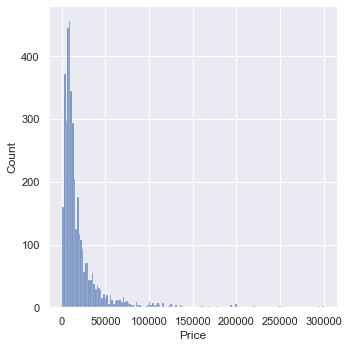

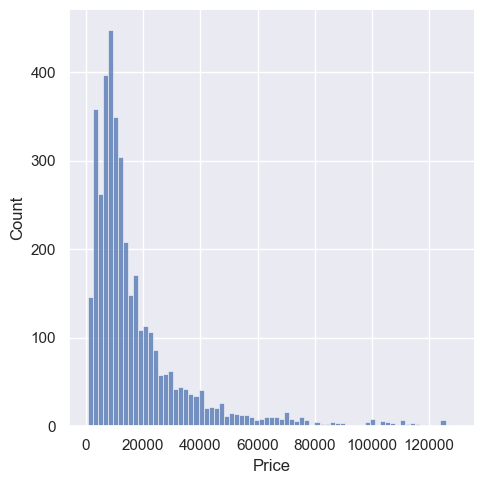

In [7]:
sns.displot(rawData['Price'])
price_quantile = rawData['Price'].quantile(0.99)
data_price = rawData[rawData['Price'] < price_quantile]
sns.displot(data_price['Price'])

##### Mileage PDF

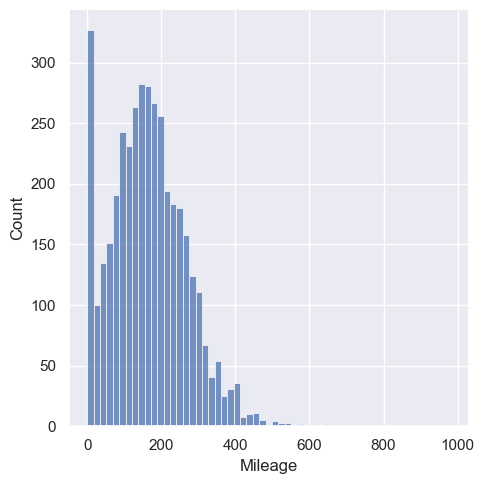

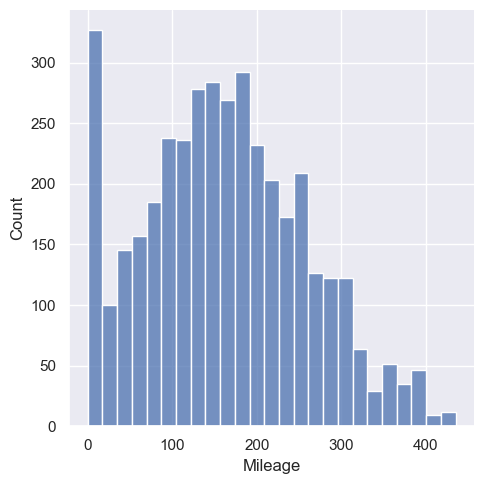

In [8]:
sns.displot(data_price['Mileage'])
mileage_quantile = data_price['Mileage'].quantile(0.99)
data_mileage = data_price[data_price['Mileage'] < mileage_quantile]
sns.displot(data_mileage['Mileage'])

##### EngineV PDF

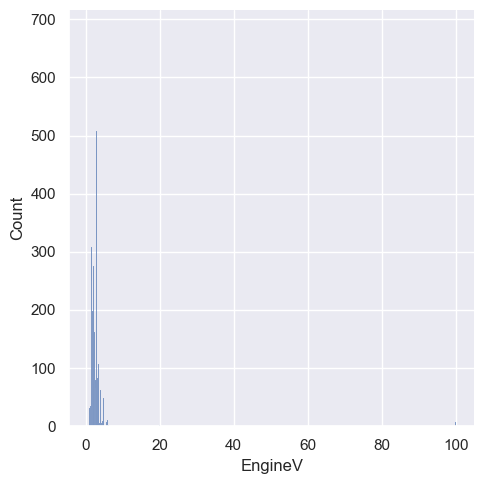

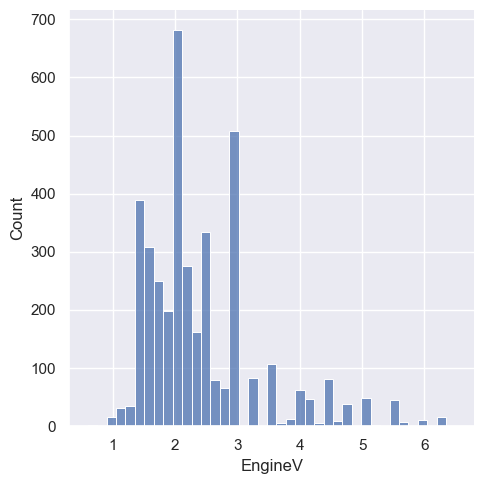

In [9]:
sns.displot(data_mileage['EngineV'])
data_engineV = data_mileage[data_mileage['EngineV'] <= 6.5]
sns.displot(data_engineV['EngineV'])

##### Year PDF

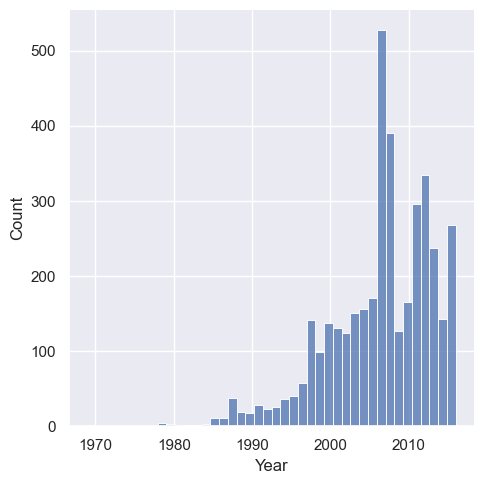

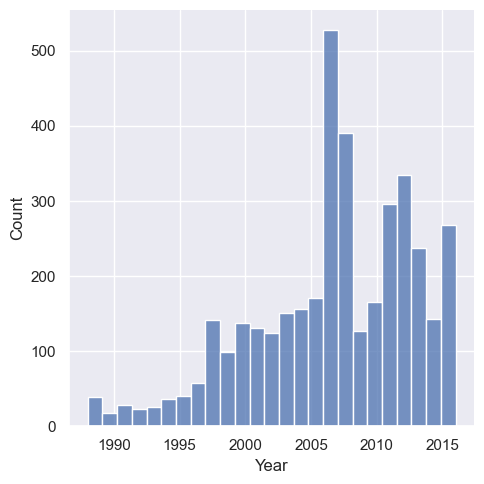

In [10]:
sns.displot(data_engineV['Year'])
year_quantile = data_engineV['Year'].quantile(0.01)
data_year = data_engineV[data_engineV['Year'] > year_quantile]
sns.displot(data_year['Year'])

In [11]:
data_cleaned = data_year.reset_index(drop=True)
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [12]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3868,3868.000000,3868,3868.000000,3868.000000,3868,3868,3868.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1468,NaN,NaN,1807,3506,NaN
mean,NaN,18198.929708,NaN,160.542399,2.451487,NaN,NaN,2006.710186
std,NaN,19085.415722,NaN,95.620925,0.951474,NaN,NaN,6.103116
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### OLS Assumptions

In [13]:
y = data_cleaned['Price']

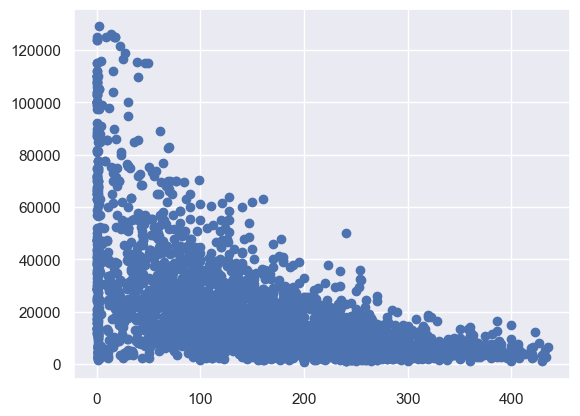

In [14]:
plt.scatter(data_cleaned['Mileage'], y)

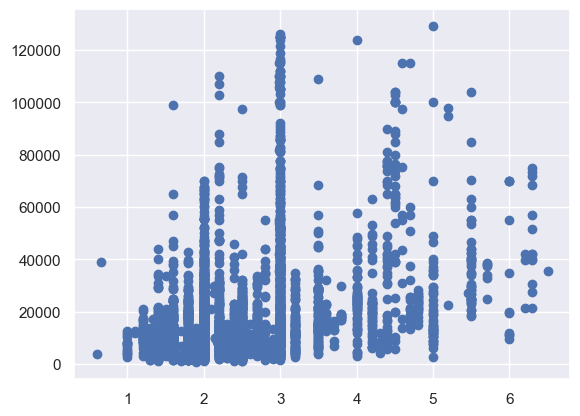

In [15]:
plt.scatter(data_cleaned['EngineV'], y)

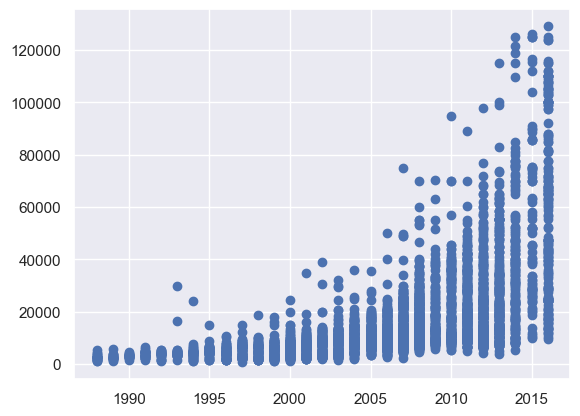

In [16]:
plt.scatter(data_cleaned['Year'], y)

### Relax OLS Assumptions

In [17]:
y_relax = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = y_relax
data_cleaned = data_cleaned.drop(['Price'], axis=1)

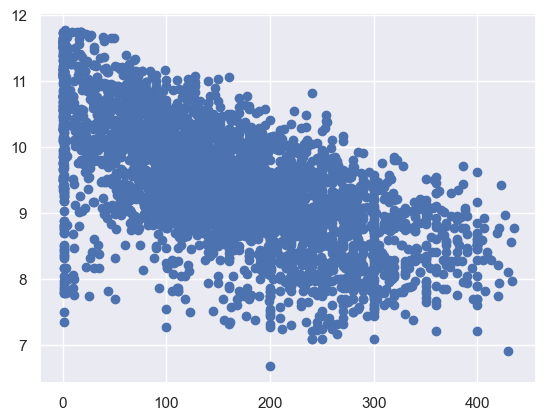

In [18]:
plt.scatter(data_cleaned['Mileage'], y_relax)

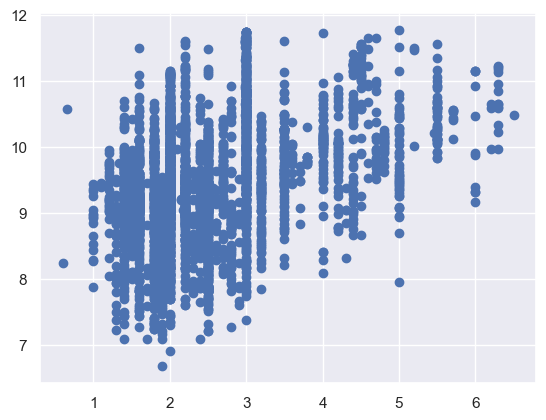

In [19]:
plt.scatter(data_cleaned['EngineV'], y_relax)

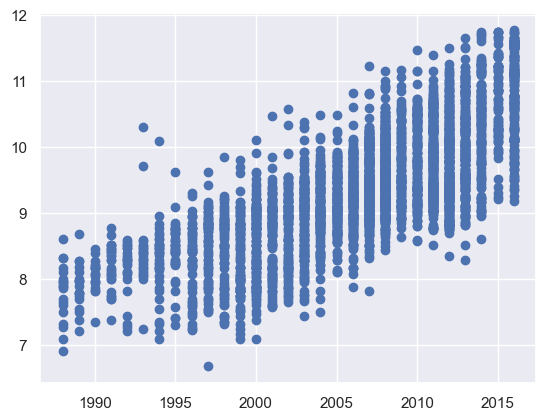

In [20]:
plt.scatter(data_cleaned['Year'], y_relax)

### Multi-Collinearity Check (Variance Inflation Factor)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
VIF = pd.DataFrame(data=['Mileage', 'EngineV', 'Year'],
                  columns=['features'])
vif_var = data_cleaned[['Mileage', 'EngineV', 'Year']]
VIF['VIF'] = [variance_inflation_factor(vif_var.values, i) for i in range(vif_var.shape[1])]

VIF

,features,VIF
0,Mileage,3.792300
1,EngineV,7.638286
2,Year,10.332226


##### As Year has a high VIF, we'll drop it

In [23]:
data_cleaned = data_cleaned.drop(['Year'], axis=1)
VIF_dropped = pd.DataFrame(data=['Mileage', 'EngineV'],
                  columns=['features'])
vif_var = data_cleaned[['Mileage', 'EngineV']]
VIF_dropped['VIF'] = [variance_inflation_factor(vif_var.values, i) for i in range(vif_var.shape[1])]

VIF_dropped

,features,VIF
0,Mileage,2.803162
1,EngineV,2.803162


### Rearranging the data

In [24]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'log_price'], dtype=object)

In [25]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand', 'Body', 'Engine Type', 'Registration']

data_cleaned = data_cleaned[cols]
data_cleaned.head()

,log_price,Mileage,EngineV,Brand,Body,Engine Type,Registration
0,8.342840,277,2.0,BMW,sedan,Petrol,yes
1,8.974618,427,2.9,Mercedes-Benz,van,Diesel,yes
2,9.495519,358,5.0,Mercedes-Benz,sedan,Gas,yes
3,10.043249,240,4.2,Audi,crossover,Petrol,yes
4,9.814656,120,2.0,Toyota,crossover,Petrol,yes


### Dummy Categorical

In [26]:
data_dummy = pd.get_dummies(data_cleaned, drop_first=True)
data_dummy.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [27]:
data_preprocessed = data_dummy.copy()
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [28]:
data_preprocessed.describe(include='all')

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000
mean,9.415978,160.542399,2.451487,0.161324,0.195450,0.078077,0.111686,0.128749,0.219235,0.065408,0.095657,0.379524,0.096174,0.157704,0.146846,0.025595,0.360393,0.906412
std,0.876668,95.620925,0.951474,0.367877,0.396598,0.268327,0.315020,0.334965,0.413782,0.247277,0.294158,0.485331,0.294867,0.364511,0.353998,0.157943,0.480177,0.291293
min,6.684612,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.881836,91.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,9.367344,157.000000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.985068,225.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,11.769287,435.000000,6.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Regression Models

### Declare Targets (y) and Inputs (x)

In [29]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Standardize Inputs

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
Scaler = StandardScaler()
Scaler.fit(inputs)
inputs_scaled = Scaler.transform(inputs)
inputs_scaled

array([[ 1.21806663, -0.47457404,  2.28006972, ..., -0.16207071,
         1.33219703,  0.32132782],
       [ 2.78696375,  0.47144889, -0.43858308, ..., -0.16207071,
        -0.75063972,  0.32132782],
       [ 2.06527107,  2.67883571, -0.43858308, ..., -0.16207071,
        -0.75063972,  0.32132782],
       ...,
       [-1.58502956,  0.57656255, -0.43858308, ..., -0.16207071,
        -0.75063972,  0.32132782],
       [-1.66870407,  1.10213084,  2.28006972, ..., -0.16207071,
         1.33219703,  0.32132782],
       [-0.38220843, -0.47457404, -0.43858308, ..., -0.16207071,
        -0.75063972,  0.32132782]])

# Train Test Spilt

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

# 1. Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs=-1)
regression.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

##### R-Score and Adjusted R-Score

In [35]:
R2 = regression.score(x_train, y_train)
R2

0.7497845242593033

In [36]:
def Adjusted_R2(independent_variable, dependent_variable, reg_model):
    R2 = reg_model.score(independent_variable, dependent_variable)
    n = independent_variable.shape[0]
    p = independent_variable.shape[1]
    
    adjustedR2 = 1 - (1-R2) * ((n-1) / (n-p-1))
    return adjustedR2

In [37]:
Adjusted_R2(independent_variable=x_train, dependent_variable=y_train, reg_model=regression)

0.7484016688992279

### Weights and Bias

In [38]:
weights = regression.coef_
bias = regression.intercept_
bias

9.413175707783935

### Features Selection

In [39]:
from sklearn.feature_selection import f_regression

In [40]:
f_Stats = f_regression(x_train, y_train)[0].round(3)
p_values = f_regression(x_train, y_train)[1].round(3)

### Summary Table

In [41]:
summary_table = pd.DataFrame(data=inputs.columns.values,
                            columns=['features'])
summary_table['Weights'] = weights
summary_table['f_Stats'] = f_Stats
summary_table['p_values'] = p_values

summary_table

,features,Weights,f_Stats,p_values
0,Mileage,-0.463576,1919.115,0.000
1,EngineV,0.212907,622.707,0.000
2,Brand_BMW,0.017216,27.238,0.000
3,Brand_Mercedes-Benz,0.012248,55.855,0.000
4,Brand_Mitsubishi,-0.133541,19.769,0.000
5,Brand_Renault,-0.181625,127.104,0.000
6,Brand_Toyota,-0.057883,72.880,0.000
7,Brand_Volkswagen,-0.091207,47.997,0.000
8,Body_hatch,-0.147139,65.801,0.000
9,Body_other,-0.098548,4.378,0.036


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth" : [i for i in range(1, 20, 1)],
              "random_state": [42],
              "min_samples_split": [i for i in range(2, 20, 1)],
              "min_samples_leaf": [i for i in range(1, 20, 1)]
             }

DTM_model = DecisionTreeRegressor()
grid_reg = GridSearchCV(DTM_model, param_grid, cv=4)
grid_reg.fit(x_train, y_train)

print("R-Squared::{}".format(grid_reg.best_score_))
print("Best Hyperparameters::\n{}".format(grid_reg.best_params_))

In [42]:
from sklearn.tree import DecisionTreeRegressor
DTR_model = DecisionTreeRegressor(max_depth=8, 
                                  min_samples_leaf=3, 
                                  min_samples_split=14, 
                                  random_state=42)
DTR_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=14,
                      random_state=42)

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

y_pred = DTR_model.predict(x_train)
print('Decision Tree:',
      '\nR2:', r2_score(y_train, y_pred), 
      '\nMSE: ', mean_squared_error(y_train, y_pred), 
      '\nMAPE: ', mean_absolute_percentage_error(y_train, y_pred))

Decision Tree: 
R2: 0.7968250805517756 
MSE:  0.1545260351534457 
MAPE:  0.03071869157449593


# Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42, n_jobs=-1)
rfr.fit(x_train, y_train)
rfr.score(x_train, y_train)

0.962442659069476

In [46]:
y_pred = rfr.predict(x_train)
print('Random Forest:',
      '\nR2:', r2_score(y_train, y_pred), 
      '\nMSE: ', mean_squared_error(y_train, y_pred), 
      '\nMAPE: ', mean_absolute_percentage_error(y_train, y_pred))

Random Forest: 
R2: 0.962442659069476 
MSE:  0.028564485226135576 
MAPE:  0.012650253381762096


# XGBOOST

In [47]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42, n_jobs=-1)
xgb_model.fit(x_train, y_train)
xgb_model.score(x_train, y_train)

0.9511138839438678

In [48]:
y_pred = xgb_model.predict(x_train)
print('XGBoost Tree:',
      '\nR2:', r2_score(y_train, y_pred), 
      '\nMSE: ', mean_squared_error(y_train, y_pred), 
      '\nMAPE: ', mean_absolute_percentage_error(y_train, y_pred))

XGBoost Tree: 
R2: 0.9511138839438678 
MSE:  0.037180660431517375 
MAPE:  0.015184700419410928


# LGBM Regressor

In [49]:
from lightgbm import LGBMRegressor

lgbm_reg = LGBMRegressor(random_state=42, n_jobs=-1)
lgbm_reg.fit(x_train, y_train)
lgbm_reg.score(x_train, y_train)

0.8740628679433983

In [51]:
y_pred = lgbm_reg.predict(x_train)
print('LGBM Regressor:',
      '\nR2:', r2_score(y_train, y_pred), 
      '\nMSE: ', mean_squared_error(y_train, y_pred), 
      '\nMAPE: ', mean_absolute_percentage_error(y_train, y_pred))

LGBM Regressor: 
R2: 0.8740628679433983 
MSE:  0.09578232268113077 
MAPE:  0.02459159296902803


### Plot and Compare Targets and its Prediction

In [52]:
y_hat = lgbm_reg.predict(x_train)

Text(0, 0.5, 'y_hat (Predictions)')

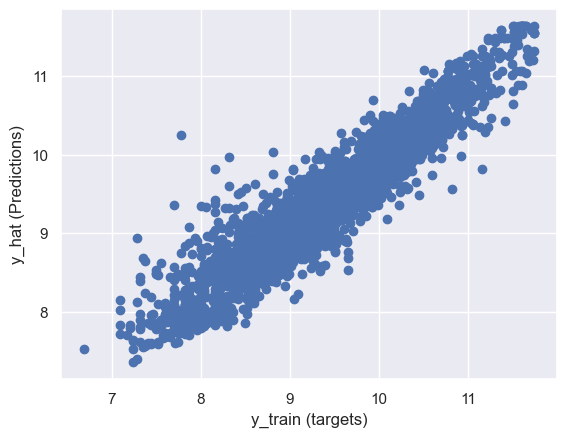

In [53]:
plt.scatter(y_train, y_hat)
plt.xlabel('y_train (targets)')
plt.ylabel('y_hat (Predictions)')

### Plot and Compare the residuals

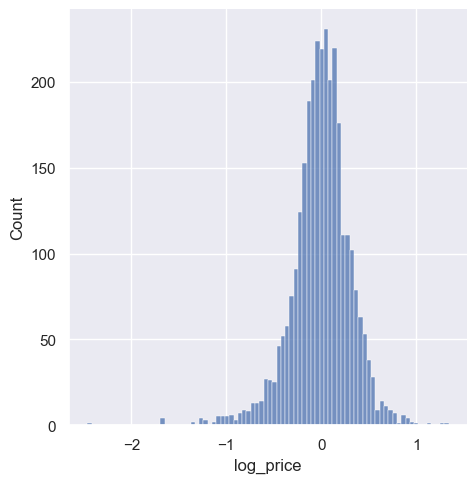

In [54]:
residual = y_train - y_hat
sns.displot(residual)

### MAPE (Training Set)

In [55]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [56]:
train_MAPE = MAPE(y_true=y_train, y_pred=y_hat)
train_MAPE

0.02459159296902803

# Testing the Data

### Reset the index

In [57]:
y_test = y_test.reset_index(drop=True)

### Predicting the inputs test set

In [58]:
y_hat_test = lgbm_reg.predict(x_test)

### Plot and Compare targets and its prediction

Text(0, 0.5, 'y_hat_test (Prediction)')

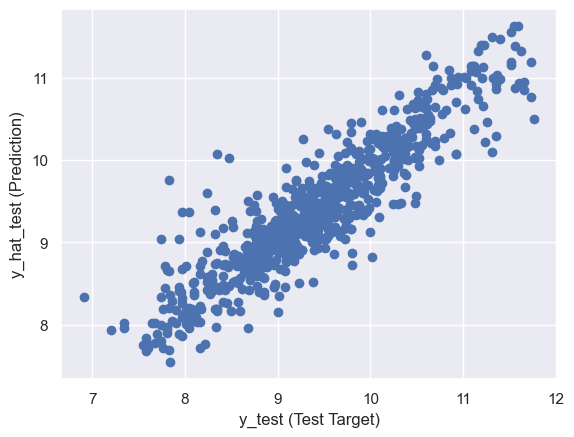

In [59]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('y_test (Test Target)')
plt.ylabel('y_hat_test (Prediction)')

### Plot and Compare using Residuals

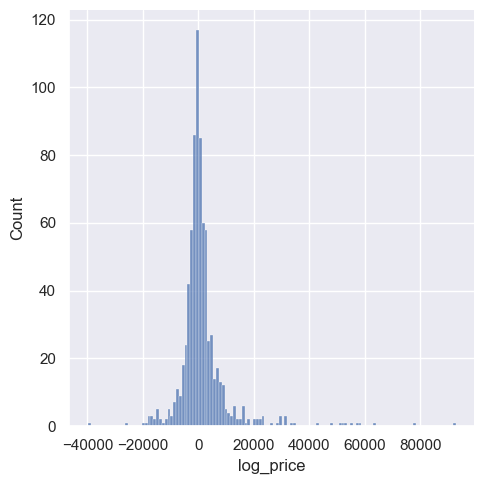

In [60]:
residual_test = np.exp(y_test) - np.exp(y_hat_test)
sns.displot(residual_test)

### Prediction's Dataset Performance

In [61]:
prediction = pd.DataFrame(data=np.exp(y_hat_test),
                         columns=['y_hat_test (Prediction)'])
prediction['y_test (targets)'] = np.exp(y_test)
prediction['Residual'] = residual_test
prediction['Residual Percentage'] = np.absolute(prediction['Residual'] / prediction['y_test (targets)'] * 100).round(3)
prediction

,y_hat_test (Prediction),y_test (targets),Residual,Residual Percentage
0,20115.865904,24500.0,4384.134096,17.894
1,6406.097162,8900.0,2493.902838,28.021
2,46552.362243,69900.0,23347.637757,33.401
3,4410.033836,7000.0,2589.966164,37.000
4,6449.170926,5400.0,-1049.170926,19.429
...,...,...,...,...
769,36961.210902,39500.0,2538.789098,6.427
770,7164.341794,8800.0,1635.658206,18.587
771,7563.960036,12500.0,4936.039964,39.488
772,65074.701569,65000.0,-74.701569,0.115


In [62]:
prediction.describe(include='all')

,y_hat_test (Prediction),y_test (targets),Residual,Residual Percentage
count,774.000000,774.000000,774.000000,774.000000
mean,17241.390402,18841.112041,1599.721639,29.780953
std,16539.815541,20314.008413,9825.905070,44.029284
min,1884.819817,999.000000,-39898.144580,0.007000
25%,7390.259959,6999.000000,-1943.302952,9.079000
50%,11527.284768,11931.000000,59.447792,20.043000
75%,20807.611603,22375.000000,2781.786828,35.317250
max,112849.381153,129222.000000,92716.171350,595.568000


In [63]:
lgbm_reg.score(x_test, y_test)

0.8234074333718897

In [64]:
Adjusted_R2(independent_variable=x_test, dependent_variable=y_test, reg_model=lgbm_reg)

0.8194364365032681

### Testing Set Results

In [65]:
print('LGBM Regressor:',
      '\nR2:', r2_score(y_test, y_hat_test), 
      '\nMSE: ', mean_squared_error(y_test, y_hat_test), 
      '\nMAPE: ', mean_absolute_percentage_error(y_test, y_hat_test))

LGBM Regressor: 
R2: 0.8234074333718897 
MSE:  0.14113186655616242 
MAPE:  0.029323492465596315
